In [134]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
import librosa
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq,ifft
from scipy import signal

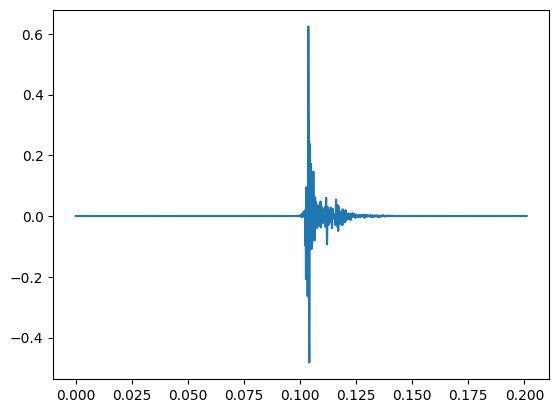

In [135]:
path = 'clap.wav'
window = 200
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

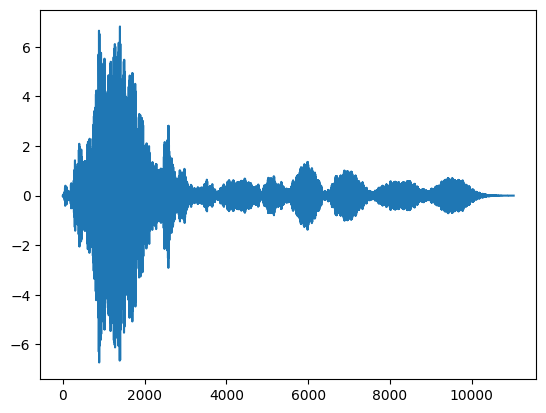

In [136]:
audio_fft = rfft(audio)
sample_period = 1/sample_rate
W=rfftfreq(audio.size,sample_period)
plt.plot(W,audio_fft)
plt.show

In [137]:
def func_fft(audio, sample_rate):
    audio_fft = rfft(audio)
    W = rfftfreq(audio.size,1/sample_rate)
    return audio_fft, W


def get_ranges(audio_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    W=rfftfreq(audio.size,sample_period)
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    for i in range(len(W)):
        if audio_fft[i] > average:
            if not clean_freq:
                clean_freq.append((W[i],W[i]+2*window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i] > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
                elif audio_fft[i]> fig_a[-1]:
                    
                    clean_freq.pop(-1)
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.pop(-1)
                    fig_a.pop(-1)
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])


    
    plt.plot(W,audio_fft)
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(202.98962093862815, 602.9896209386281),
 (685.5821299638989, 1085.5821299638988),
 (1198.0257220216606, 1598.0257220216606),
 (1506.4869133574007, 1906.4869133574007),
 (1735.345216606498, 2135.345216606498),
 (1994.0546028880867, 2394.0546028880867),
 (2387.093862815884, 2787.093862815884),
 (2775.157942238267, 3175.157942238267),
 (4247.811371841155, 4647.811371841155),
 (4959.262184115523, 5359.262184115523),
 (5790.117328519856, 6190.117328519856),
 (6685.649819494584, 7085.649819494584),
 (6959.284747292419, 7359.284747292419),
 (9227.967057761733, 9627.967057761733),
 (100, 700)]

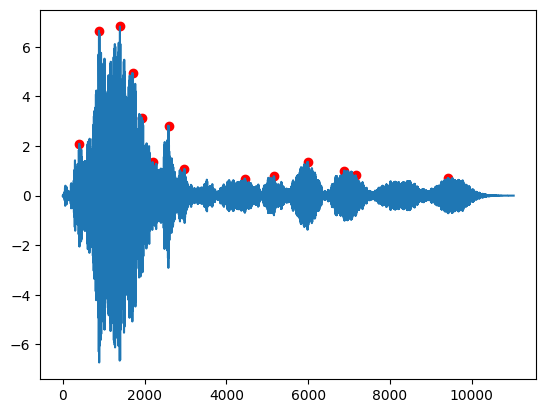

In [138]:
audio_fft, W = func_fft(audio,sample_rate)
ranges = get_ranges(audio_fft, W,sample_rate,window)
ranges.append((100,700))
ranges

In [139]:

def remove_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        time =np.linspace(0,ranges[i][1]-ranges[i][0],len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))
        han = 0.5-0.5*np.cos((2*np.pi*time)/(time[-1]-1))
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(-20*han/20) 
    plt.plot(W,cuttoff)
    return cuttoff

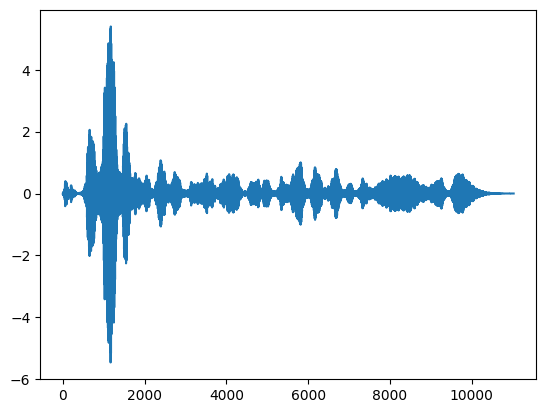

In [127]:
trimed = remove_ranges(audio_fft, W, ranges,window)
audio_final = irfft(trimed)
f, t, Sxx = signal.spectrogram(audio_final, sample_rate)

Audio(audio_final, rate = sample_rate)

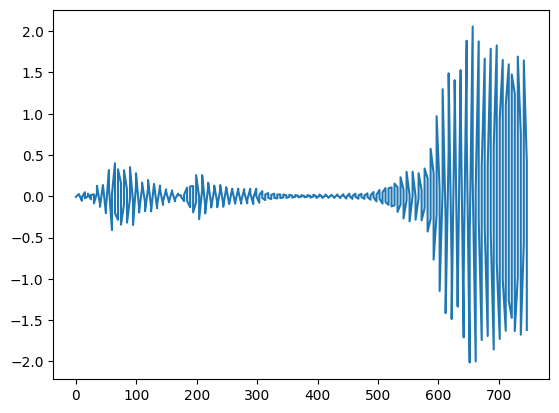

In [128]:
plt.plot(W[(W<750)],trimed[(W<750)])

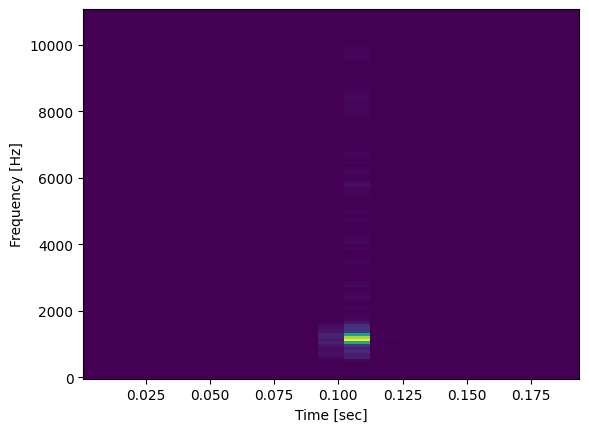

In [129]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

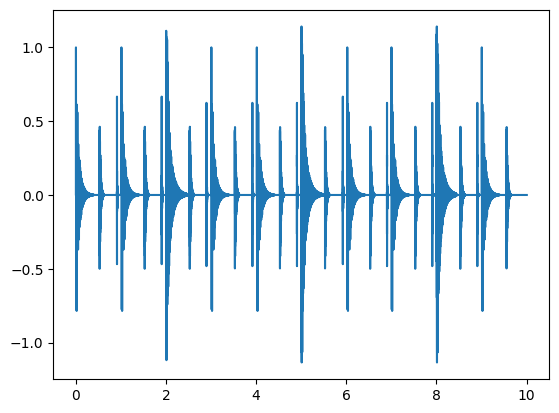

In [130]:
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)


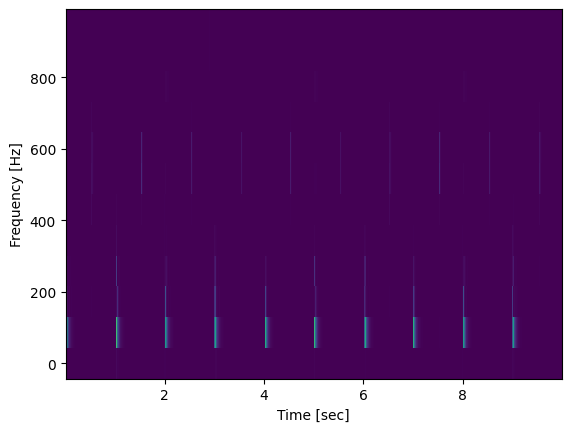

In [131]:
f, t, Sxx = signal.spectrogram(audio, sample_rate)
plt.pcolormesh(t, f[f<1000], Sxx[f<1000])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

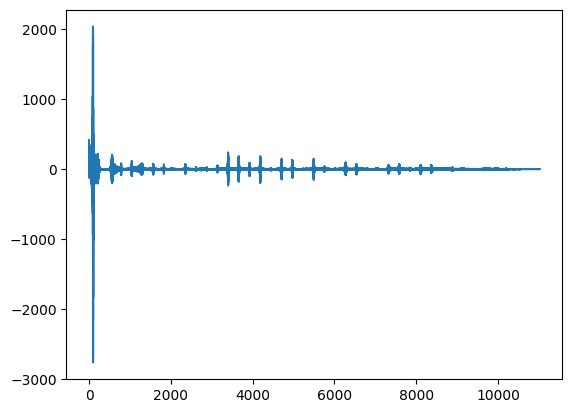

In [132]:
audio_fft, W = func_fft(audio,sample_rate)
audio_final = irfft(remove_ranges(audio_fft, W, ranges,window))
Audio(audio_final, rate = sample_rate)

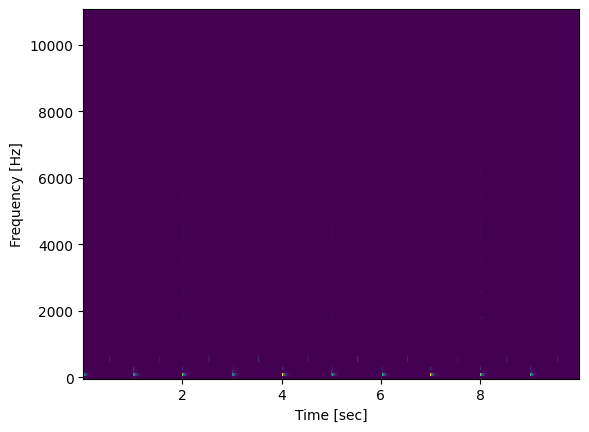

In [133]:
f, t, Sxx = signal.spectrogram(audio, sample_rate)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [481]:
path = 'allmixed3.wav'
audio, sample_rate = librosa.load(path)

D_harmonic = librosa.effects.harmonic(audio)

In [482]:
import soundfile as sf
sf.write('proccessed.wav', D_harmonic, sr, subtype='PCM_24')

In [483]:
y, sr = librosa.load(librosa.ex('choice'))
y_harmonic = librosa.effects.harmonic(y)